# The Traveling Salesman Problem Algorithms

## TSP Brute Force

### The brute force implementation of The Traveling Salesman Problem

Best Path: [0, 4, 1, 6, 9, 7, 2, 8, 3, 5, 0]
Minimum Cost: 290.31


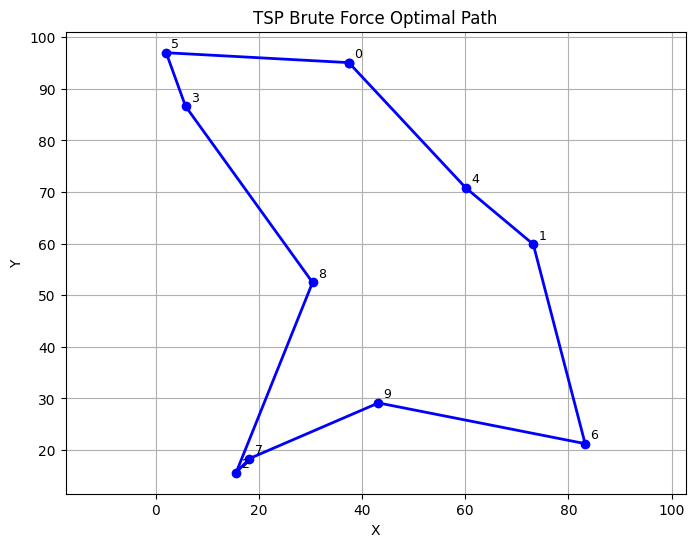

In [20]:
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt

# Randomly generate cities
def generate_cities(n, seed=42):
    np.random.seed(seed)
    return np.random.rand(n, 2) * 100  # n cities, scaled to 100x100 grid

# Compute the distance
def compute_distance_matrix(coords):
    n = len(coords)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i][j] = np.linalg.norm(coords[i] - coords[j])
    return dist_matrix

# Plot the path
def plot_path(coords, path, title="TSP Brute Force Optimal Path"):
    path_coords = coords[list(path)]
    plt.figure(figsize=(8, 6))
    plt.plot(path_coords[:, 0], path_coords[:, 1], 'o-', color='blue', linewidth=2)
    for i, (x, y) in enumerate(coords):
        plt.text(x + 1, y + 1, f'{i}', fontsize=9)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Brute Force implementation of the Traveling Salesman Problem
def tsp_brute_force(dist):
    # Declare the variables needed    
    n = len(dist) 
    cities = list(range(1, n))  # exclude starting city 0
    min_path = []
    min_cost = float('inf')

    # Try all permutations of the cities (excluding starting point)
    for perm in permutations(cities):
        current_cost = 0
        current_path = [0] + list(perm) + [0]  # start and end at 0

        # Calculate path cost
        for i in range(n):
            current_cost += dist[current_path[i]][current_path[i + 1]]

        # Update minimum if needed
        if current_cost < min_cost:
            min_cost = current_cost
            min_path = current_path

    return min_path, min_cost

# Number of cities
num_cities = 10

# Generate cities and distance matrix
coords = generate_cities(num_cities)
dist_matrix = compute_distance_matrix(coords)

# Call the function to find the best path
path, cost = tsp_brute_force(dist_matrix)

# Output and plot
print("Best Path:", path)
print("Minimum Cost:", round(cost, 2))
plot_path(coords, path)

# TCP with Nearest Neigbor and Genetic Algorithm

1. Generate random cities and compute distances
2. Create initial population using NN from different starting cities
3. Run the genetic algorithm for specified generations
4. Track the best solution found throughout the evolution
5. Return and visualize the optimal path

Best path: [0, np.int64(4), np.int64(1), np.int64(6), np.int64(9), np.int64(7), np.int64(2), np.int64(8), np.int64(3), np.int64(5)]
Total distance: 290.31


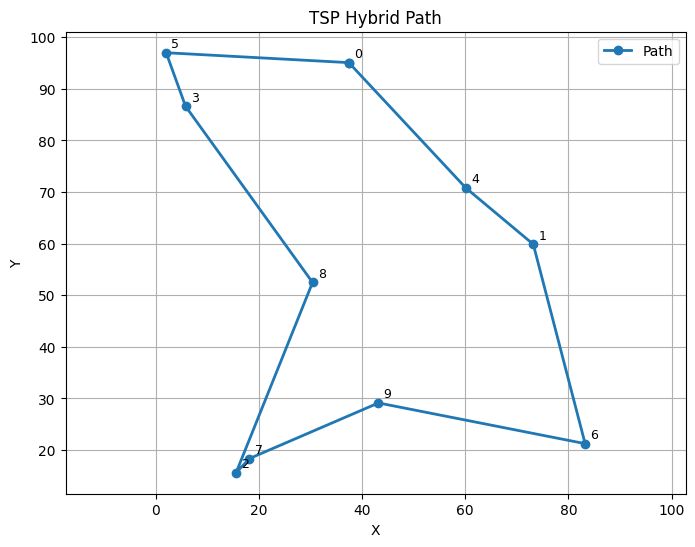

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import namedtuple

# --- City & Distance Setup ---

def generate_cities(n, seed=42):
    np.random.seed(seed)
    return np.random.rand(n, 2) * 100

def compute_distance_matrix(coords):
    if coords is None or len(coords) == 0:
        raise ValueError("Invalid coordinates")
    diff = coords[:, np.newaxis, :] - coords[np.newaxis, :, :]
    return np.linalg.norm(diff, axis=2)

# --- Nearest Neighbor ---

def nearest_neighbor_path(dist, start=0):
    n = len(dist)
    visited = [False] * n
    path = [start]
    visited[start] = True
    current = start

    for _ in range(n - 1):
        distances = [dist[current][j] if not visited[j] else np.inf for j in range(n)]
        next_city = np.argmin(distances)
        path.append(next_city)
        visited[next_city] = True
        current = next_city

    return path

# --- Genetic Algorithm ---

# Calculates the total tour distance including return to starting city
def calculate_path_cost(path, dist):
    return sum(dist[path[i]][path[(i + 1) % len(path)]] for i in range(len(path)))

# Maintains the relative ordering of cities from both parents
def order_crossover(parent1, parent2):
    a, b = sorted(random.sample(range(len(parent1)), 2))
    middle = parent1[a:b+1]
    rest = [city for city in parent2 if city not in middle]
    return rest[:a] + middle + rest[a:]

# Reverses a random subsequence 
def mutate(path, mutation_rate=0.1):
    new_path = path.copy()
    if random.random() < mutation_rate:
        a, b = sorted(random.sample(range(len(new_path)), 2))
        new_path[a:b+1] = reversed(new_path[a:b+1])
    return new_path

# Returns the best one based on fitness
def tournament_selection(pop, fitnesses, k=3):
    selected = random.sample(list(zip(pop, fitnesses)), k)
    return min(selected, key=lambda x: x[1])[0]

GeneticResult = namedtuple('GeneticResult', ['path', 'cost'])

def genetic_algorithm(dist, initial_population, generations=500, mutation_rate=0.1, elite_size=1):
    population = initial_population
    best_path = None
    best_cost = float('inf')

    for _ in range(generations):
        fitnesses = [calculate_path_cost(p, dist) for p in population]
        ranked = sorted(zip(population, fitnesses), key=lambda x: x[1])

        if ranked[0][1] < best_cost:
            best_cost = ranked[0][1]
            best_path = ranked[0][0]

        new_population = [r[0] for r in ranked[:elite_size]]

        while len(new_population) < len(population):
            parent1 = tournament_selection(population, fitnesses)
            parent2 = tournament_selection(population, fitnesses)
            child = order_crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        population = new_population

    return GeneticResult(path=best_path, cost=best_cost)

# --- Visualization ---

def plot_path(coords, path, title="TSP Hybrid Path"):
    coords = np.array(coords)
    path_coords = coords[path + [path[0]]]
    plt.figure(figsize=(8, 6))
    plt.plot(path_coords[:, 0], path_coords[:, 1], 'o-', lw=2, label='Path')
    for i, (x, y) in enumerate(coords):
        plt.text(x + 1, y + 1, f'{i}', fontsize=9)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.show()

# --- Main Function ---

def main():
    n_cities = 10
    coords = generate_cities(n_cities)
    dist = compute_distance_matrix(coords)

    initial_population = [nearest_neighbor_path(dist, start=i) for i in range(n_cities)]
    result = genetic_algorithm(dist, initial_population, generations=300)

    print(f"Best path: {result.path}")
    print("Total distance:", round(result.cost, 2))
    plot_path(coords, result.path)

if __name__ == "__main__":
    main()